In [23]:
from sklearn.datasets import make_classification

X,y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1
)

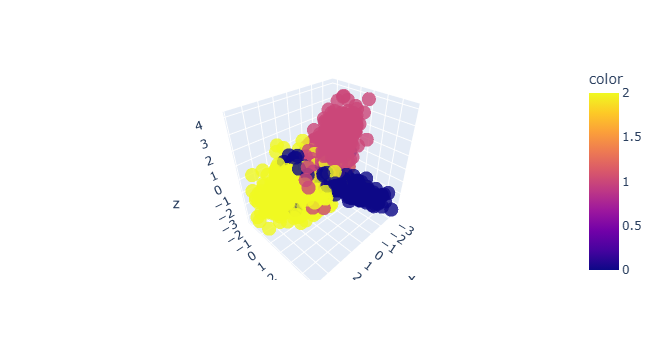

In [24]:
import plotly.express as px

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()

### PCA

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

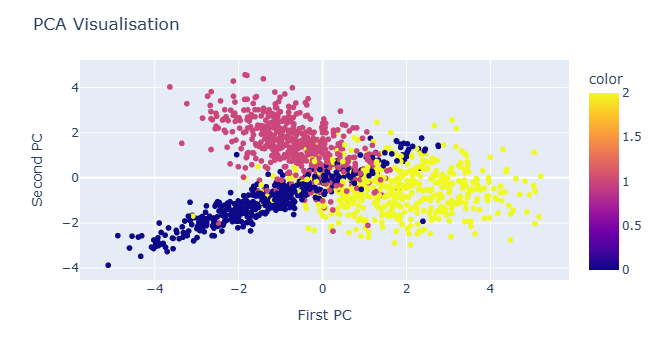

In [26]:
fig = px.scatter(x=X_pca[:,0], y=X_pca[:,1], color=y)
fig.update_layout(
    title='PCA Visualisation',
    xaxis_title='First PC',
    yaxis_title='Second PC'
)
fig.show()

### t-SNE

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

1.1278395652770996

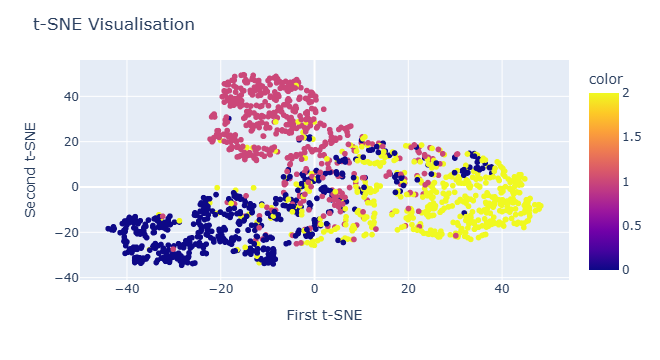

In [29]:
fig = px.scatter(x=X_tsne[:,0], y=X_tsne[:,1], color=y)
fig.update_layout(
    title='t-SNE Visualisation',
    xaxis_title='First t-SNE',
    yaxis_title='Second t-SNE'
)
fig.show()

# t-SNE on a Customer Churn Dataset

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import pandas as pd
df = pd.read_csv('Customer Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


#### PCA dimensionality reduction

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


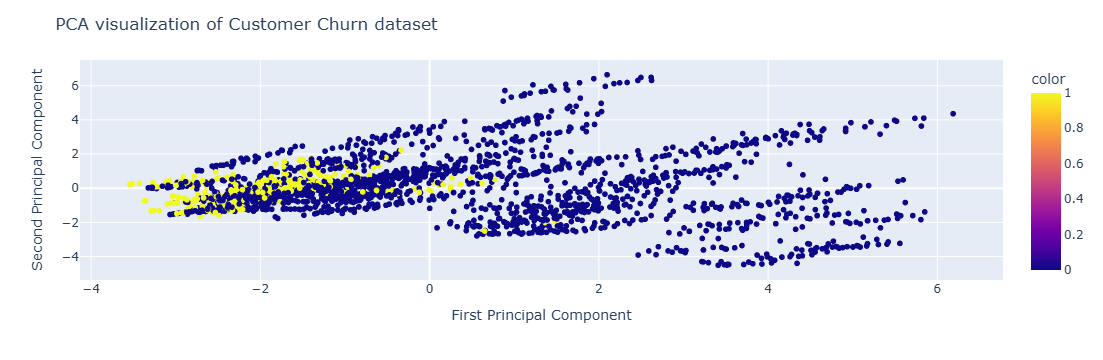

In [8]:
fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization of Customer Churn dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

#### Checking perplexity vs. divergence

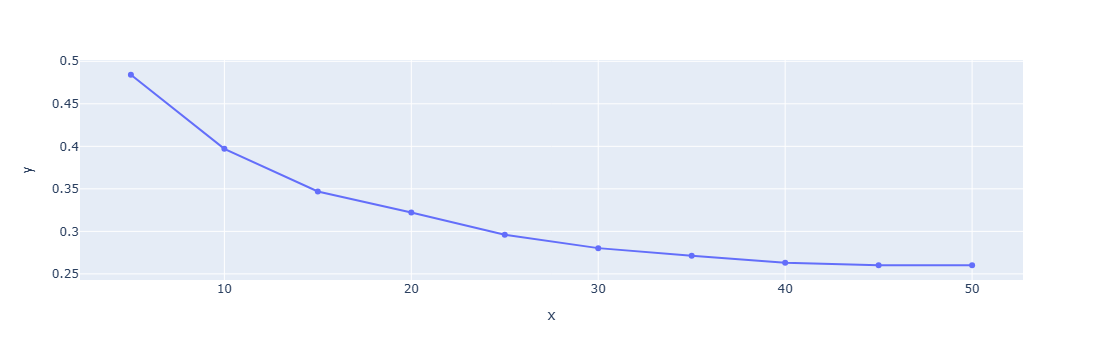

In [11]:
import numpy as np

perplexity = np.arange(5,55,5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)

fig = px.line(x=perplexity, y=divergence, markers=True)
fig.show()

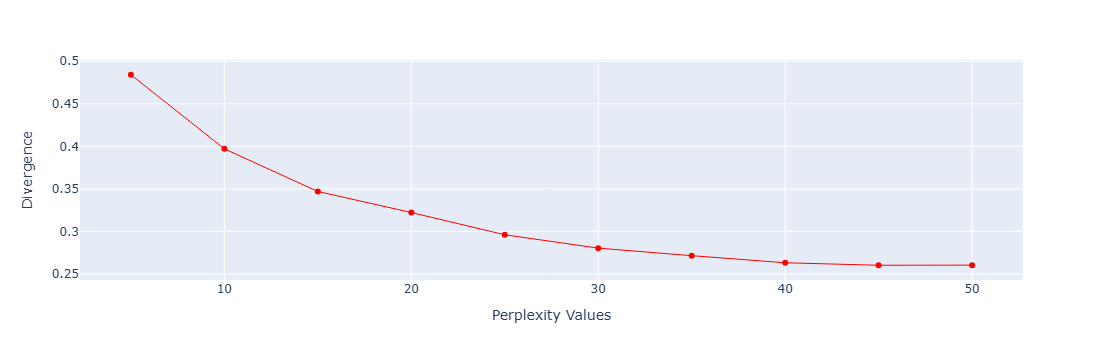

In [12]:
fig.update_layout(xaxis_title='Perplexity Values', yaxis_title='Divergence')
fig.update_traces(line_color='red', line_width=1)

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

0.26213210821151733

In [17]:
X_train.shape

(2362, 15)

In [19]:
X_train_tsne

array([[ 24.81793  , -31.784668 ],
       [-30.304153 ,  31.288134 ],
       [-47.629913 ,  11.5203705],
       ...,
       [  4.1952806, -11.534686 ],
       [  4.15744  , -12.652264 ],
       [ 18.850864 ,   7.9290066]], shape=(2362, 2), dtype=float32)

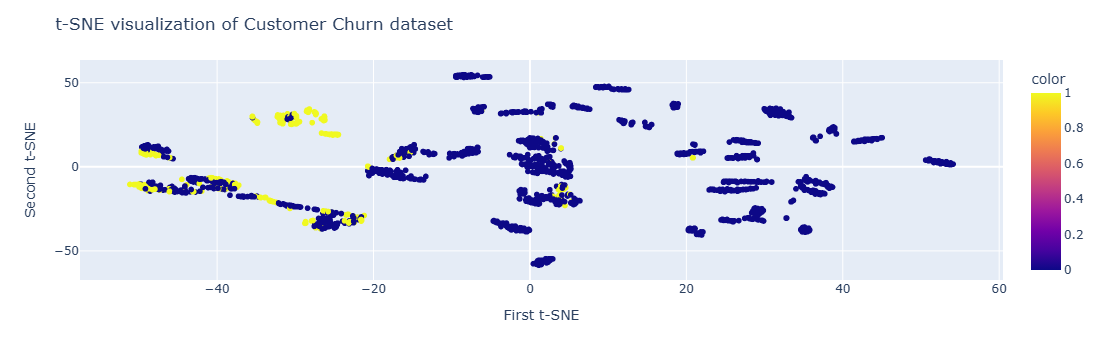

In [14]:
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of Customer Churn dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

### Limitations and Challenges of t-SNE

- computational cost
- sensitivity to hyperparameters
- lack of interpretability
- not suitable for out-of-sample data

### Applications of t-sne

- Clustering and classification
- Anomaly detection
- Natural language processing
- computer security
- cancer research
- Geological domain interpretation
- Biomedical signal processing- 